In [70]:
import cv2
import numpy as np
import tensorflow as tf

In [12]:
%run -i ../ownlib/RIW-Library.ipynb
%run -i ../ownlib/Utility.ipynb

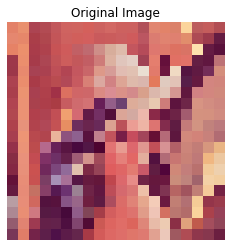

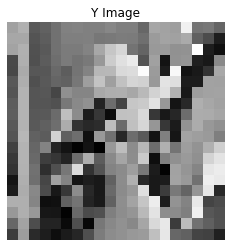

In [71]:
N = 20

img = cv2.imread('../assets/lena.png')
img = cv2.resize(img, (N, N))
img_y = getYFromBGR(img)
imgshow1(img, 'Original Image')
imgshow1(img_y, 'Y Image')

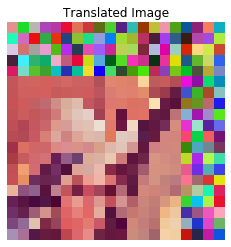

In [41]:
img_translated_test = attackTranslate(img, np.random.uniform(-0.3,0.3), np.random.uniform(-0.3,0.3))
imgshow1(img_translated_test, 'Translated Image')

In [118]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(N, N)),
#   tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [119]:
TL = 60000

In [120]:
x_train = []
y_train = []
for i in range(TL):
#     px = np.random.uniform(-0.3,0.3)
#     img_tr = attackTranslate(img, px, 0)
#     img_tr_y = getYFromBGR(img_tr)
    x_train.append(img_y)
    y_train.append(0.13)
x_train = np.array(x_train)
y_train = np.array(y_train)
x_train.shape, y_train.shape

((60000, 20, 20), (60000,))

In [121]:
model.predict(x_train[:1])

array([[1.]], dtype=float32)

In [122]:
model.fit(x_train, y_train, epochs=5, verbose=2)

Train on 60000 samples
Epoch 1/5
60000/60000 - 2s - loss: 0.7569 - accuracy: 0.0000e+00
Epoch 2/5
60000/60000 - 2s - loss: 0.7569 - accuracy: 0.0000e+00
Epoch 3/5
60000/60000 - 2s - loss: 0.7569 - accuracy: 0.0000e+00
Epoch 4/5
60000/60000 - 2s - loss: 0.7569 - accuracy: 0.0000e+00
Epoch 5/5
60000/60000 - 2s - loss: 0.7569 - accuracy: 0.0000e+00


In [123]:
model.predict(x_train[:1])

array([[1.]], dtype=float32)